In [1]:
#!pip install LATSourceModel

#!pip install ipympl

#%matplotlib inline
#!pip install --upgrade ipympl

#%pip install -U ipympl

%matplotlib inline
#%matplotlib widget
#%matplotlib ipympl


In [5]:

# from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table

#def gaussian(x, amplitude, mean, sigma, offset):
def gaussian(x, amplitude, mean, sigma):
    #return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2)) + offset
    return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2)) 

    
data_directory = "Spectra/"

# List all files in the spectra folder
files = os.listdir(data_directory)
#sort by their download number
#files = sorted(files, key=os.path.getmtime(data_directory), reverse=True)

files = sorted(files, key=lambda f: os.path.getmtime(os.path.join(data_directory, f)), reverse=True)
i=0

avg_mean_eng = 0
avg_sig_mean = 0
mean_eng = []
sig_means = []

print("begin")
for file in files:
    
    fits_file = file
    
    # Open the FITS file
    hdul = fits.open("Spectra/"+fits_file)
    
    # Usually the photon events are in the first extension (EXTNAME='EVENTS')
    events = hdul[1].data
    
    # Extract energy and time
    energy = events['ENERGY']  # in MeV
    if len(energy) <10000:
        i+=1
        continue
    print(i,len(energy))

    time = events['TIME']
    
    hdul.info()

    # Bin the energies to make a spectrum
    #67.5MeV is the pion decay
    #emin=66
    emin=25
    #emax=69#1e5
    emax=.3e3#1e5
    nbins = int(1500*emax/500)
    #bins = np.logspace(np.log10(emin), np.log10(emax), 1000)  # 100 MeV to 100 GeV
    bins = np.linspace((emin), (emax), nbins)  # 100 MeV to 100 GeV
    #bins = np.linspace(np.log10(100), np.log10(1e5), 1000)  # 100 MeV to 100 GeV
    hist, bin_edges = np.histogram(energy, bins=bins)
    

    

    
    
    # Compute bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    #print(hist,bins)
    #print(len(hist),len(bins))
    #print(len(hist),len(bin_centers))
    # Plot the spectrum
    

    # --- Fit ---
    #p0 = [10, 200, 100.0, 0]  # initial guesses: amp, mean, sigma, offset
    p0 = [10, 200, 100.0]  # initial guesses: amp, mean, sigma, offset
    x_err = bin_centers
    y_err = .1*hist
    
    try:
        popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0,    maxfev=20000,    ftol=1e-12, xtol=1e-12, gtol=1e-12  )
    except:
        continue
    print(" amp, mean, sigma, offset:",popt)
    print()
    print("errs:",pcov)
    #amp, mean, sigma, offset = popt
    amp, mean, sigma = popt
    mean_eng.append(mean)
    sig_means.append(sigma)
    
    
    
    plot = False
    if plot:
        plt.figure(figsize=(80,5))
    
        plt.scatter(bin_centers,hist)
    
        plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', lw=2, label="Gaussian fit")
    
        num_ticks = 50  # number of ticks you want
        plt.xticks(np.linspace(emin, emax, num_ticks))
        
        plt.loglog(bin_centers, hist, drawstyle='steps-mid')
        plt.ylim(min(hist),max(hist))
        plt.xlim(emin,emax)
        
        plt.xlabel("Energy [MeV]")
        plt.ylabel("Counts")
        plt.title("Fermi-LAT Spectrum")
        plt.grid(True, which="both", ls="--")
        plt.show()
    
    
        plt.figure(figsize=(80,5))
        
        
    
    
        plt.loglog(bin_centers, hist, drawstyle='steps-mid')
        plt.plot(bin_centers, hist, drawstyle='steps-mid')
        
        plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', lw=2, label="Gaussian fit")
    
        plt.ylim(min(hist),max(hist))
        plt.xlim(emin,emax)
        
        plt.xlabel("Energy [MeV]")
        plt.ylabel("Counts")
        plt.title("Fermi-LAT Spectrum")
        plt.grid(True, which="both", ls="--")
        plt.show()
    i+=1

print("Average peak:",np.mean(mean_eng),"+-",np.std(mean_eng))
print("Average sigma:",np.mean(sig_means),"+-",np.std(sig_means), "(without individual errors)")
mean_eng.append(mean)
sig_means.append(sigma)

begin
4 23155
Filename: Spectra/L250815123926F357373F84_PH02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    211   23155R x 23C   ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'J', 'J', 'I', '3I', '32X', '32X', 'I', 'D', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     46   13732R x 2C   [D, D]   
 amp, mean, sigma, offset: [ 21.08082046 116.689089   119.36008901]

errs: [[ 0.05873637  0.12194255 -0.47216463]
 [ 0.12194255  6.8007637  -5.5940111 ]
 [-0.47216463 -5.5940111  11.39988096]]
7 35368
Filename: Spectra/L250815123843F357373F29_PH06.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    208   35368R x 23C   ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'J', 'J', 'I', '3I', '32X', '32X', 'I', 'D', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTab

KeyError: "Key 'ENERGY' does not exist."

Average peak: 63.66009280121256 +- 332.06773152917344 from  8182 samples
Average sigma: 162.99998841892497 +- 93.66125068997206 (without individual errors)

 amp, mean, sigma: [5.e+00 1.e-10 1.e+00]

errs: [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]

 amp, mean, sigma: [ 16.59783928 125.93776013  46.32923842]

errs: [[ 0.12475159  0.00512032 -0.24045995]
 [ 0.00512032  1.29474439 -0.0353079 ]
 [-0.24045995 -0.0353079   1.35705133]]

 amp, mean, sigma: [ 16.59783946 125.93775939  46.32923743]

errs: [[ 0.12475159  0.00512032 -0.24045995]
 [ 0.00512032  1.29474433 -0.03530789]
 [-0.24045995 -0.03530789  1.35705127]]

 amp, mean, sigma: [ 16.59783924 125.93776031  46.32923864]

errs: [[ 0.12475159  0.00512032 -0.24045995]
 [ 0.00512032  1.2947444  -0.0353079 ]
 [-0.24045995 -0.0353079   1.35705134]]

 amp, mean, sigma: [ 16.59783503 125.93777813  46.32926232]

errs: [[ 0.12475153  0.00512033 -0.24046004]
 [ 0.00512033  1.29474577 -0.03530803]
 [-0.24046004 -0.03530803  1.35705292]]

 am

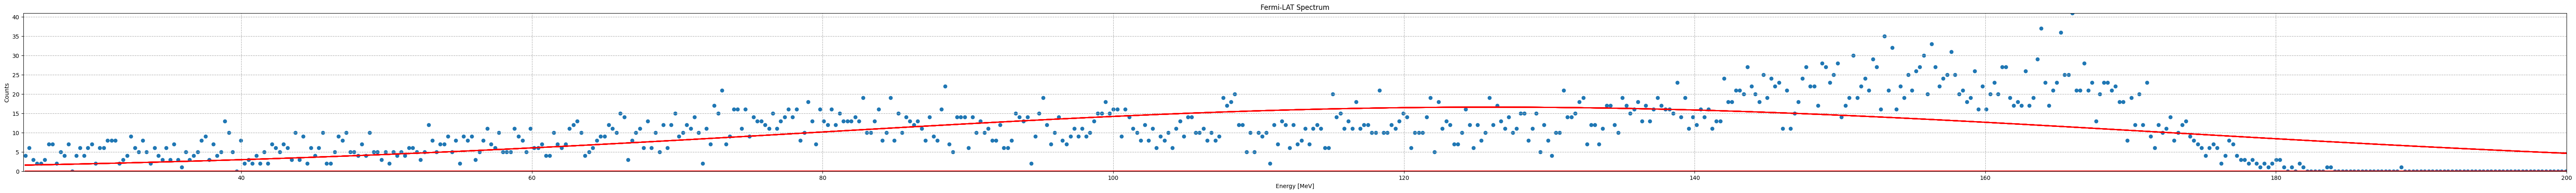

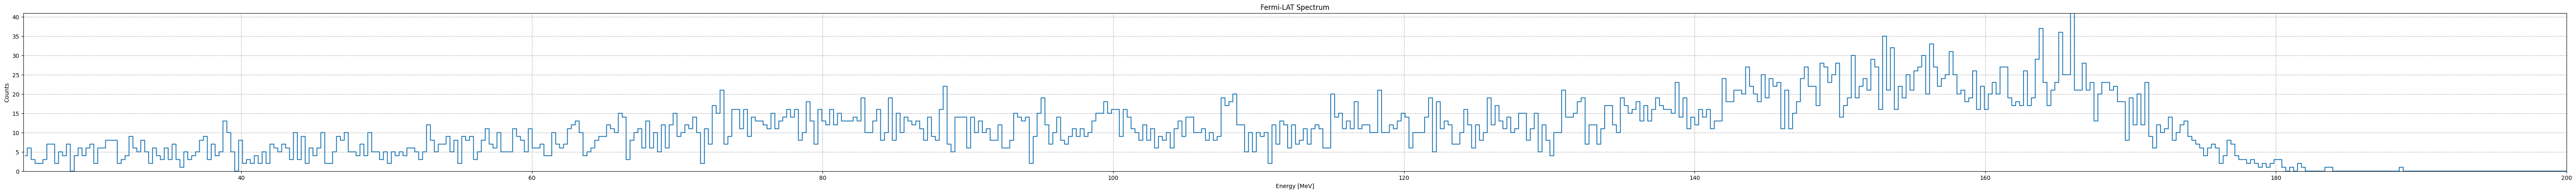

In [12]:
import numpy as np
print("Average peak:",np.mean(mean_eng),"+-",np.std(mean_eng), 'from ',len(mean_eng),'samples')
print("Average sigma:",np.mean(sig_means),"+-",np.std(sig_means), "(without individual errors)")
print()

#def gaussian(x, amplitude, mean, sigma, offset):
def gaussian(x, amplitude, mean, sigma):
    #return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2)) + offset
    return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2)) 



mmin=25#min(mean_eng)
#emax=69#1e5
mmax=200#max(mean_eng)
nbins = int(len(mean_eng)/8)
#bins = np.logspace(np.log10(emin), np.log10(emax), 1000)  # 100 MeV to 100 GeV
bins = np.linspace((emin), (emax), nbins)  # 100 MeV to 100 GeV
#bins = np.linspace(np.log10(100), np.log10(1e5), 1000)  # 100 MeV to 100 GeV
hist, bin_edges = np.histogram(mean_eng, bins=bins)




plt.figure(figsize=(80,5))


# Compute bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


# Plot the spectrum

for k in range(15):
    
    p0 = [5, 20*k, 1.0]  # initial guesses: amp, mean, sigma

    # Fit with bounds: sigma between 0.5 and 2.0
    #bounds_lower = [0, 20*k, 0.0]
    #bounds_upper = [1000, 20*(k+1), 1000.0]
    bounds_lower = [0, 0, 0.0]
    bounds_upper = [1000, 400, 1000.0]

    popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0,    maxfev=20000,    ftol=1e-12, xtol=1e-12, gtol=1e-12 ,bounds=(bounds_lower, bounds_upper) )

    print(" amp, mean, sigma:",popt)
    print()
    print("errs:",pcov)
    print()
    plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', lw=2, label="Gaussian fit")



plt.scatter(bin_centers,hist)


plt.ylim(min(hist),max(hist))
#plt.xlim(mmin,mmax)
plt.xlim(mmin,mmax)

plt.xlabel("Energy [MeV]")
plt.ylabel("Counts")
plt.title("Fermi-LAT Spectrum")
plt.grid(True, which="both", ls="--")
plt.show()



plt.figure(figsize=(80,5))


plt.plot(bin_centers, hist, drawstyle='steps-mid')

plt.ylim(min(hist),max(hist))
#plt.xlim(mmin,mmax)
plt.xlim(mmin,mmax)

plt.xlabel("Energy [MeV]")
plt.ylabel("Counts")
plt.title("Fermi-LAT Spectrum")
plt.grid(True, which="both", ls="--")
plt.show()


In [ ]:
# eng from brightness plot:


# from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

data_directory = "Spectra/"

# List all files in the spectra folder
files = os.listdir(data_directory)
#sort by their download number
#files = sorted(files, key=os.path.getmtime(data_directory), reverse=True)

files = sorted(files, key=lambda f: os.path.getmtime(os.path.join(data_directory, f)), reverse=True)



print("begin")
for file in files:
    
    fits_file = file
    
    # Open the FITS file
    hdul = fits.open("Spectra/"+fits_file)
    
    # Usually the photon events are in the first extension (EXTNAME='EVENTS')
    events = hdul[1].data
    
    # Extract energy and time
    energy = events['ENERGY']  # in MeV
    if len(energy) <5000:
        i+=1
        continue
    print(i,len(energy))

    time = events['TIME']
    
    hdul.info()

    # Bin the energies to make a spectrum
    #67.5MeV is the pion decay
    #emin=66
    emin=25
    #emax=69#1e5
    emax=.3e3#1e5
    nbins = int(1500*emax/500)
    #bins = np.logspace(np.log10(emin), np.log10(emax), 1000)  # 100 MeV to 100 GeV
    bins = np.linspace((emin), (emax), nbins)  # 100 MeV to 100 GeV
    #bins = np.linspace(np.log10(100), np.log10(1e5), 1000)  # 100 MeV to 100 GeV
    hist, bin_edges = np.histogram(energy, bins=bins)
    

    

    plt.figure(figsize=(80,5))
    
    
    # Compute bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    #print(hist,bins)
    #print(len(hist),len(bins))
    #print(len(hist),len(bin_centers))
    # Plot the spectrum
    
    plt.scatter(bin_centers,hist)

    # --- Fit ---
    #p0 = [10, 200, 100.0, 0]  # initial guesses: amp, mean, sigma, offset
    p0 = [10, 200, 100.0]  # initial guesses: amp, mean, sigma, offset
    x_err = bin_centers
    y_err = .1*hist
    
    try:
        popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0,    maxfev=20000,    ftol=1e-12, xtol=1e-12, gtol=1e-12  )
    except:
        continue
    print(" amp, mean, sigma, offset:",popt)
    print()
    print("errs:",pcov)
    #amp, mean, sigma, offset = popt
    amp, mean, sigma = popt
    mean_eng.append(mean)
    sig_means.append(sigma)

    
    plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', lw=2, label="Gaussian fit")

    num_ticks = 50  # number of ticks you want
    plt.xticks(np.linspace(emin, emax, num_ticks))
    
    #plt.loglog(bin_centers, hist, drawstyle='steps-mid')
    plt.ylim(min(hist),max(hist))
    plt.xlim(emin,emax)
    
    plt.xlabel("Energy [MeV]")
    plt.ylabel("Counts")
    plt.title("Fermi-LAT Spectrum")
    plt.grid(True, which="both", ls="--")
    plt.show()


    plt.figure(figsize=(80,5))
    
    
    # Compute bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Plot the spectrum
    
    plt.xticks(np.linspace(emin, emax, num_ticks))
    
    #plt.loglog(bin_centers, hist, drawstyle='steps-mid')
    plt.plot(bin_centers, hist, drawstyle='steps-mid')
    
    plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', lw=2, label="Gaussian fit")

    plt.ylim(min(hist),max(hist))
    plt.xlim(emin,emax)
    
    plt.xlabel("Energy [MeV]")
    plt.ylabel("Counts")
    plt.title("Fermi-LAT Spectrum")
    plt.grid(True, which="both", ls="--")
    plt.show()
    i+=1

print("Average peak:",np.mean(mean_eng),"+-",np.std(mean_eng))
print("Average sigma:",np.mean(sig_means),"+-",np.std(sig_means), "(without individual errors)")
mean_eng.append(mean)
sig_means.append(sigma)

plt.figure(figsize=(80,5))


# Compute bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


# Plot the spectrum

for k in range(15):
    
    p0 = [5, 20*k, 1.0]  # initial guesses: amp, mean, sigma

    # Fit with bounds: sigma between 0.5 and 2.0
    bounds_lower = [0, 20*k, 0.0]
    bounds_upper = [1000, 20*(k+1), 1.0]

    popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0,    maxfev=20000,    ftol=1e-12, xtol=1e-12, gtol=1e-12 ,bounds=(bounds_lower, bounds_upper) )

    print(" amp, mean, sigma:",popt)
    print()
    print("errs:",pcov)
    print()
    plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', lw=2, label="Gaussian fit")



plt.scatter(bin_centers,hist)


plt.ylim(min(hist),max(hist))
#plt.xlim(mmin,mmax)
plt.xlim(mmin,mmax)

plt.xlabel("Energy [MeV]")
plt.ylabel("Counts")
plt.title("Fermi-LAT Spectrum")
plt.grid(True, which="both", ls="--")
plt.show()



plt.figure(figsize=(80,5))


plt.plot(bin_centers, hist, drawstyle='steps-mid')

plt.ylim(min(hist),max(hist))
#plt.xlim(mmin,mmax)
plt.xlim(mmin,mmax)

plt.xlabel("Energy [MeV]")
plt.ylabel("Counts")
plt.title("Fermi-LAT Spectrum")
plt.grid(True, which="both", ls="--")
plt.show()
